# QUANTITATIVE COMPARISON

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

medals = pd.read_csv("Medals.csv", index_col= 0)
print(medals.head())

               Gold  Silver  Bronze
United State    137      52      67
Germany          47      43      67
Great Britain    64      55      26
Russia           50      28      35
China            44      30      35


In [8]:
print(medals.columns)

Index(['Gold', 'Silver', 'Bronze'], dtype='object')


C:\Users\Danhaya\AppData\Local\Temp\ipykernel_11584\2202417482.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


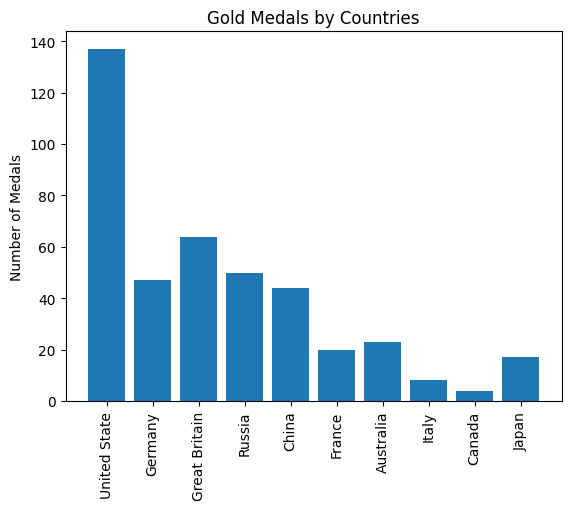

In [9]:
fig, ax=plt.subplots()
ax.bar(medals.index, medals['Gold'])

ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")
ax.set_title("Gold Medals by Countries")

plt.show()

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_11584\1705239667.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(medals.index, rotation=90)


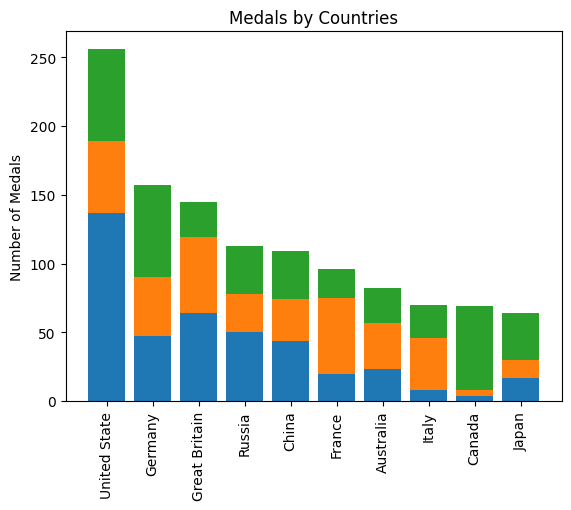

In [10]:
#stocked bar-chart

fig, ax=plt.subplots()
ax.bar(medals.index, medals['Gold'])
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'])
ax.bar(medals.index, medals['Bronze'], bottom= medals['Gold'] + medals['Silver'])

#set labels
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")
ax.set_title("Medals by Countries")

plt.show()

In [12]:
pop =pd.read_csv(r"c:/users/danhaya/arewads/world-population-dynamics/data/processed_data/processed_data.csv")

countries_by_continent = pop.groupby("Continent")["Country/Territory"].nunique()
print(countries_by_continent)


Continent
Africa           57
Asia             50
Europe           50
North America    40
Oceania          23
South America    14
Name: Country/Territory, dtype: int64


In [15]:
south_america = pop[pop['Continent'] == 'South America']
print(south_america.head())

    Unnamed: 0  Rank CCA3 Country/Territory       Capital      Continent  \
8            8    33  ARG         Argentina  Buenos Aires  South America   
24          24    80  BOL           Bolivia         Sucre  South America   
27          27     7  BRA            Brazil      Brasilia  South America   
40          40    65  CHL             Chile      Santiago  South America   
42          42    28  COL          Colombia        Bogota  South America   

    2022 Population  2020 Population  2015 Population  2010 Population  \
8          45510318         45036032         43257065         41100123   
24         12224110         11936162         11090085         10223270   
27        215313498        213196304        205188205        196353492   
40         19603733         19300315         17870124         17004162   
42         51874024         50930662         47119728         44816108   

    2000 Population  1990 Population  1980 Population  1970 Population  \
8          37070774     

In [17]:
south_america = south_america.loc[:, ["Country/Territory", "2022 Population", "Area (km²)"]]
south_america_ind = south_america.set_index("Country/Territory")

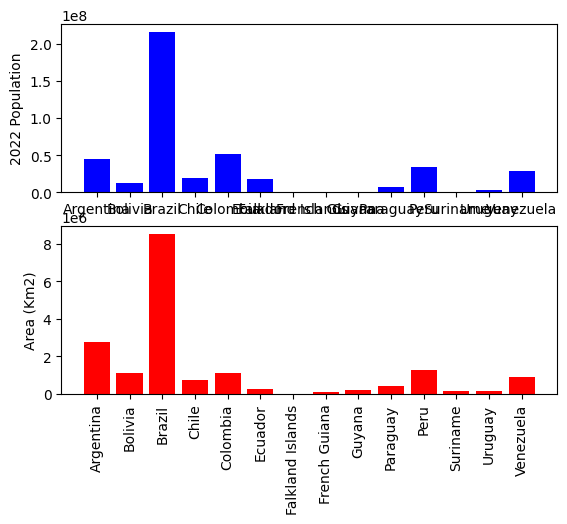

In [27]:
fig, ax=plt.subplots(2, 1)
ax[0].bar(south_america_ind.index, south_america_ind['2022 Population'], color='blue')
ax[0].set_ylabel("2022 Population")
ax[1].bar(south_america_ind.index, south_america_ind['Area (km²)'], color='red')
#ax[0].tick_params(axis = 'x', rotation=90)
ax[1].set_ylabel('Area (Km2)')
ax[1].tick_params(axis = 'x', rotation=90)

plt.show()

In [28]:
ctries_sth_amr = south_america['Country/Territory'].unique()
print(ctries_sth_amr)

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador'
 'Falkland Islands' 'French Guiana' 'Guyana' 'Paraguay' 'Peru' 'Suriname'
 'Uruguay' 'Venezuela']


C:\Users\Danhaya\AppData\Local\Temp\ipykernel_11584\3322117327.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(south_america_ind.index, rotation=90)


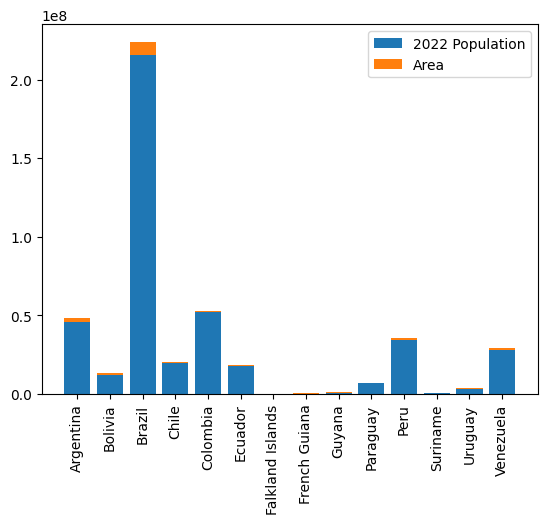

In [36]:
fig, ax=plt.subplots()
ax.bar(south_america_ind.index, south_america_ind['2022 Population'], label='2022 Population')
ax.bar(south_america_ind.index, south_america_ind['Area (km²)'], bottom= south_america_ind['2022 Population'], label='Area')
ax.set_xticklabels(south_america_ind.index, rotation=90)
plt.legend()

plt.show()

In [47]:
gdp = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/gdp.csv")
gdp = gdp.rename(columns={'Country Name': 'Country'})
south_america = south_america.rename(columns={"Country/Territory": "Country"})
print(south_america.head())

      Country  2022 Population  Area (km²)
8   Argentina         45510318     2780400
24    Bolivia         12224110     1098581
27     Brazil        215313498     8515767
40      Chile         19603733      756102
42   Colombia         51874024     1141748


In [51]:
s_amr_pop_gdp = south_america.merge(gdp,on='Country', how='inner')
print(s_amr_pop_gdp.head())

     Country  2022 Population  Area (km²) Code          1960          1961  \
0  Argentina         45510318     2780400  ARG           NaN           NaN   
1    Bolivia         12224110     1098581  BOL  3.738794e+08  4.066846e+08   
2     Brazil        215313498     8515767  BRA           NaN  1.727594e+10   
3      Chile         19603733      756102  CHL  4.110000e+09  4.609727e+09   
4   Colombia         51874024     1141748  COL  4.031153e+09  4.540448e+09   

           1962          1963          1964          1965  ...          2012  \
0  2.445060e+10  1.827212e+10  2.560525e+10  2.834471e+10  ...  5.459824e+11   
1  4.446652e+08  4.788060e+08  5.394915e+08  6.043771e+08  ...  2.708450e+10   
2  1.923175e+10  2.328771e+10  2.096373e+10  2.246552e+10  ...  2.465228e+12   
3  5.416273e+09  5.668188e+09  5.982348e+09  6.026594e+09  ...  2.671223e+11   
4  4.955544e+09  4.836167e+09  5.973367e+09  5.760762e+09  ...  3.709213e+11   

           2013          2014          2015       

In [56]:
s_amr_pop_gdp_ind = s_amr_pop_gdp.set_index("Country")

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_11584\3935207863.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(s_amr_pop_gdp_ind.index, rotation=90)


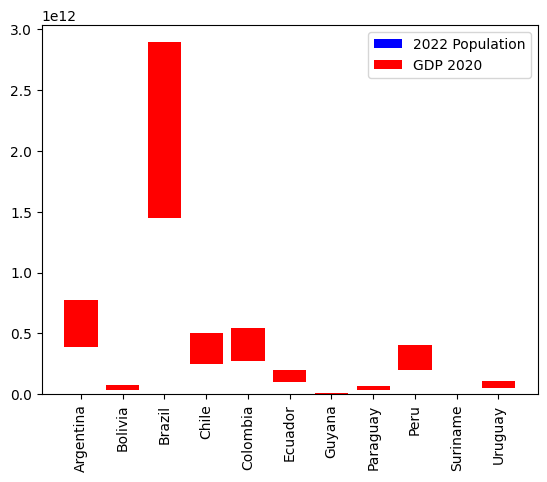

In [61]:
fig, ax =plt.subplots()
ax.bar(s_amr_pop_gdp_ind.index, s_amr_pop_gdp['2022 Population'], label='2022 Population', color='blue')
ax.bar(s_amr_pop_gdp_ind.index, s_amr_pop_gdp['2020'], bottom= s_amr_pop_gdp['2020'], label='GDP 2020', color='red')
ax.set_xticklabels(s_amr_pop_gdp_ind.index, rotation=90)
plt.legend()

plt.show()